My Git Repo:
https://github.com/mina-naseh/public-sector-pipelines

# Source and description

<span style="color:green">Full link or name of the provider: </span> https://fred.stlouisfed.org/series/DCOILBRENTEU \
<span style="color:green">Series code: </span> DCOILBRENTEU \
<span style="color:green">Date of access: </span>  Oct.13.2024 \
<span style="color:green">Description: </span> Crude Oil Prices: Brent - Europe, Units: Dollars per Barrel,
Not Seasonally Adjusted


# Characteristics

<span style="color:green"> Periodicity or frequency: </span> Daily  \
<span style="color:green"> Time span: </span> 1987-05-20 to 2024-10-07 \
<span style="color:green"> Number of observations: </span> 9755

# Figure

Plot the series and corresponding correlation and autocorrelation functions. Please plot also the first differences of the series. <span style="color:green">Modify the code below</span> so that it imports and plots your series.

# PART 1: Plot levels of the series and AC& PAC

In [ ]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
os.chdir('.')  # Set working directory to your file's location
df = pd.read_csv('DCOILBRENTEU.csv')

# Rename columns
df.columns = ['date', 'y']

# Convert 'date' column to datetime and check its data type
df['date'] = pd.to_datetime(df['date'])
print("Data types after converting 'date':\n", df.dtypes)

# Remove time part (hour:min:sec) from 'date' column
df['date'] = df['date'].dt.date
print("Data types after removing time part from 'date':\n", df.dtypes)

# Convert 'y' column to numeric and check its data type
df['y'] = pd.to_numeric(df['y'], errors='coerce')
print("Data types after converting 'y' to numeric:\n", df.dtypes)

# Check for missing values
print("Missing values before drop:\n", df.isna().sum())

# Drop rows with missing values and reset the index to align the rows properly
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)  # Reset index after dropping NaNs

print("Missing values after drop:\n", df.isna().sum())

Data types after converting 'date':
 date    datetime64[ns]
y               object
dtype: object
Data types after removing time part from 'date':
 date    object
y       object
dtype: object
Data types after converting 'y' to numeric:
 date     object
y       float64
dtype: object
Missing values before drop:
 date      0
y       267
dtype: int64
Missing values after drop:
 date    0
y       0
dtype: int64


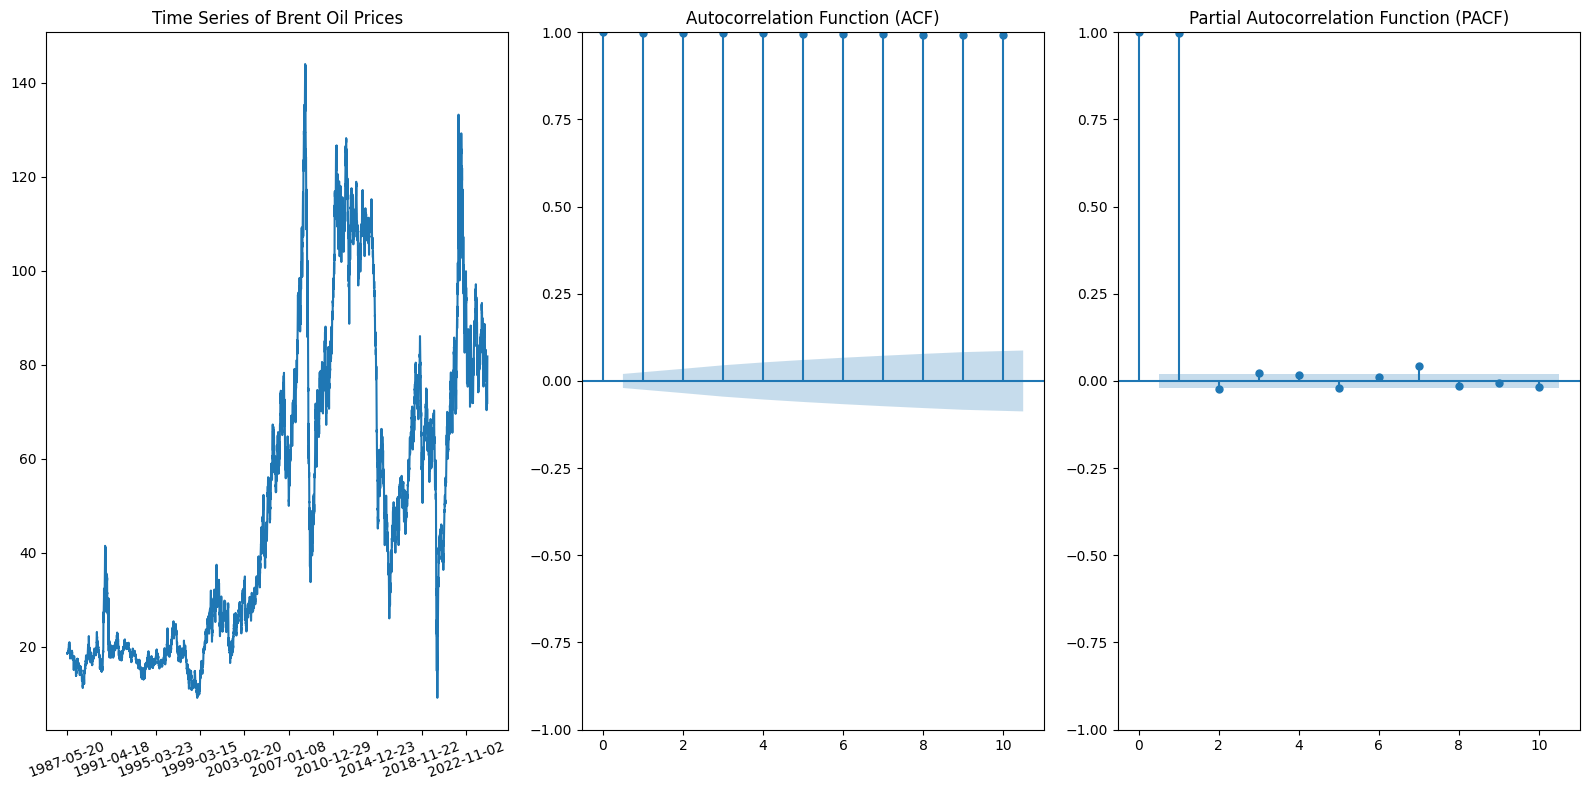

In [3]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

# Plot the 'y' column (oil prices over time)
n_tick = 1000  # Number of ticks to display
axs[0].plot(df.y)

# Set x-ticks and x-tick labels
xticks = np.arange(0, len(df.y), n_tick)
axs[0].set_xticks(xticks)

# Ensure that the number of labels matches the number of ticks
xtick_labels = df.date.iloc[xticks].astype(str)  # Convert dates to strings for labeling
axs[0].set_xticklabels(xtick_labels, rotation=20)

# Set title for the first plot
axs[0].set_title('Time Series of Brent Oil Prices')

# Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF)
sm.graphics.tsa.plot_acf(df.y, lags=10, ax=axs[1])
axs[1].set_title('Autocorrelation Function (ACF)')

sm.graphics.tsa.plot_pacf(df.y, lags=10, ax=axs[2])
axs[2].set_title('Partial Autocorrelation Function (PACF)')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the plots
plt.show()

As we have a lot of samples in this time series, we are also able to choose just a subset of the data. We can check the plots of different subsets of the time series with the following function:

In [4]:
# Function to plot data with start index `m` and `size`, and optional column selection
def plot_subset(df, start_index=0, subset_size=None, column='y'):
    """
    Plot the time series, ACF, and PACF for a specific range of the data.
    
    Parameters:
    df : pandas DataFrame
        The input DataFrame containing the time series data.
    start_index : int
        The starting index (m) for the subset of data to plot.
    subset_size : int, optional
        The number of rows to include in the subset. If None, all data from start_index to the end is used.
    column : str
        The column to plot. Options are 'y' (Brent oil prices) or 'dy' (percentage changes).
    """
    # Determine the subset based on start index and size
    if subset_size is not None:
        end_index = start_index + subset_size
        df_subset = df.iloc[start_index:end_index]
    else:
        df_subset = df.iloc[start_index:]  # From start_index to the end if size is not provided

    # Ensure that the start index and size don't exceed the available data length
    if df_subset.empty:
        print("The selected subset is empty. Check your start index and size.")
        return
    
    # Validate the column choice
    if column not in ['y', 'dy']:
        print(f"Invalid column '{column}' specified. Choose 'y' or 'dy'.")
        return

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    # Plot the selected column ('y' for oil prices or 'dy' for percentage changes)
    n_tick = 100  # Set number of ticks to display, you can adjust based on your dataset
    axs[0].plot(df_subset[column])

    # Set x-ticks and x-tick labels
    xticks = np.arange(start_index, start_index + len(df_subset[column]), n_tick)  # Corrected tick positions
    axs[0].set_xticks(xticks)

    # Ensure that the number of labels matches the number of ticks
    xtick_labels = df.date.iloc[xticks].astype(str)  # Convert dates to strings for labeling
    axs[0].set_xticklabels(xtick_labels, rotation=20)  # Rotate labels for better readability
    
    # Set title based on selected column
    title = 'Brent Oil Prices' if column == 'y' else 'Percentage Change of Brent Oil Prices'
    axs[0].set_title(f'{title} (Samples: {start_index} to {start_index + len(df_subset)})')
    
    # Plot the autocorrelation function (ACF) for the selected column
    sm.graphics.tsa.plot_acf(df_subset[column], lags=10, ax=axs[1])
    axs[1].set_title(f'Autocorrelation of {title}')
    
    # Plot the partial autocorrelation function (PACF) for the selected column
    sm.graphics.tsa.plot_pacf(df_subset[column], lags=10, ax=axs[2])
    axs[2].set_title(f'Partial Autocorrelation of {title}')
    
    # Adjust layout to avoid overlapping elements
    plt.tight_layout()

    # Show the plots
    plt.show()

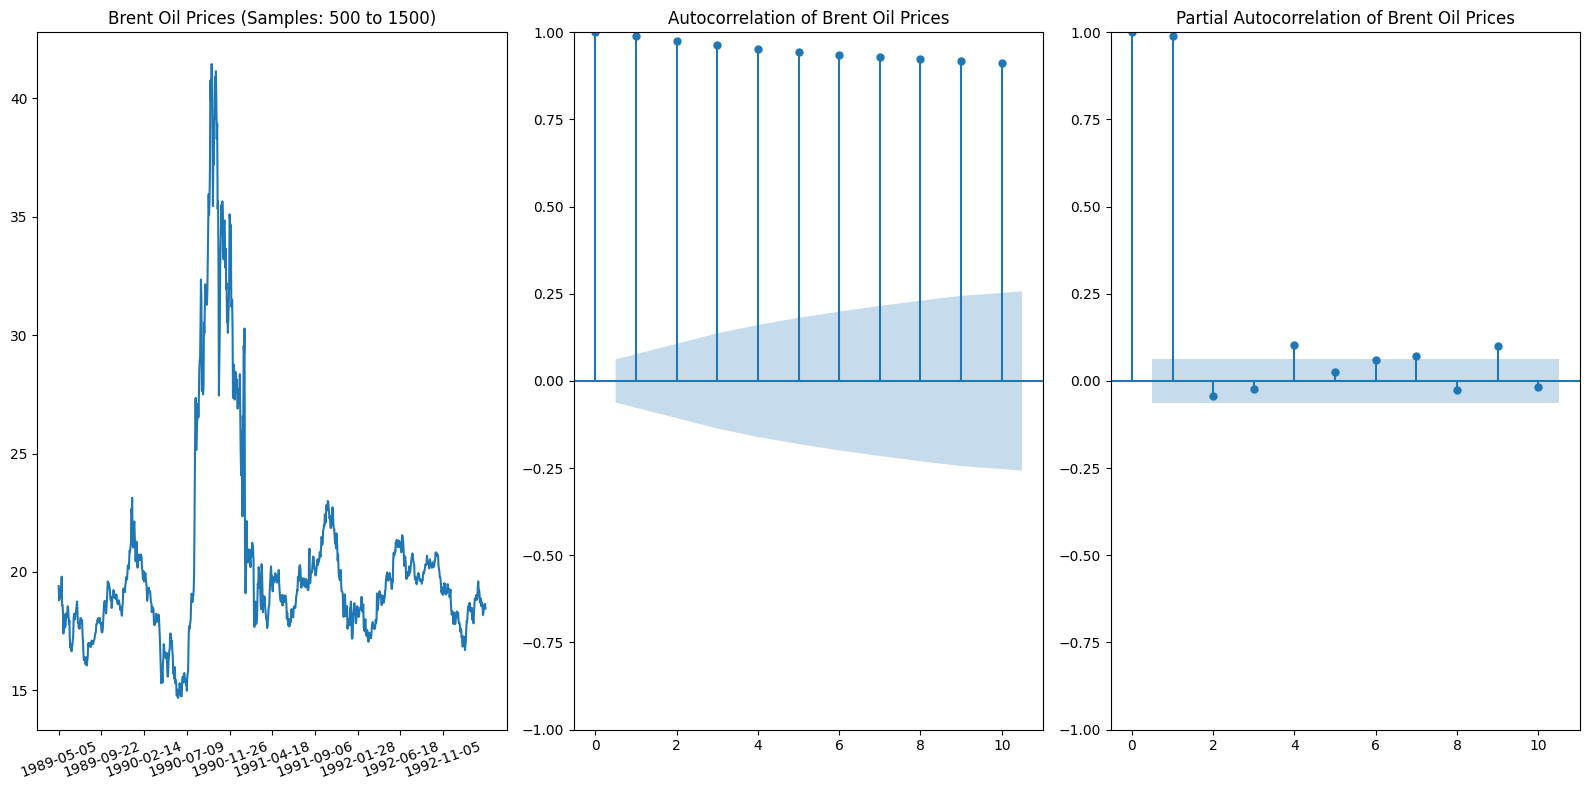

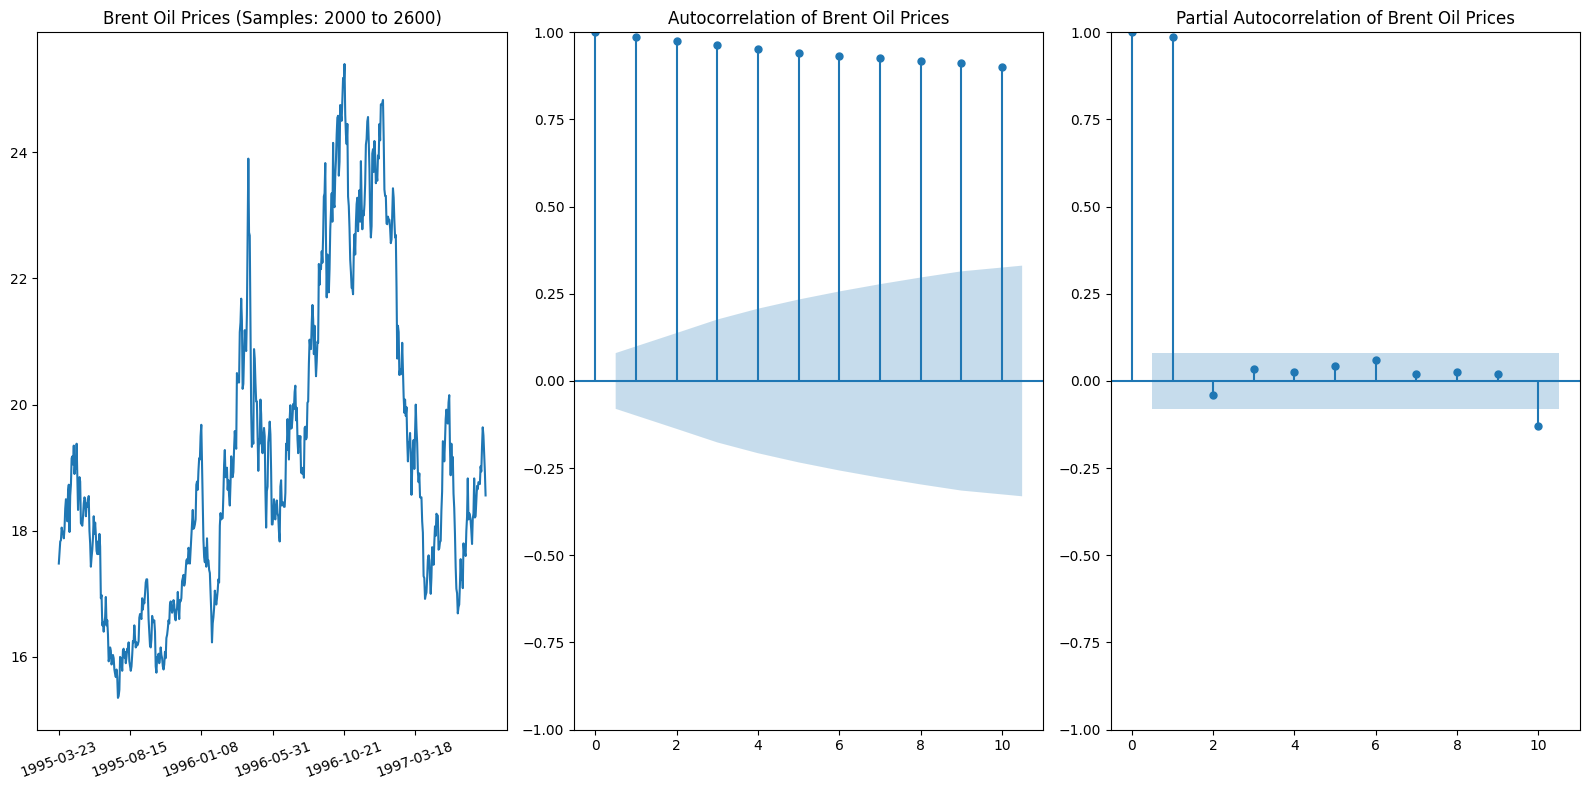

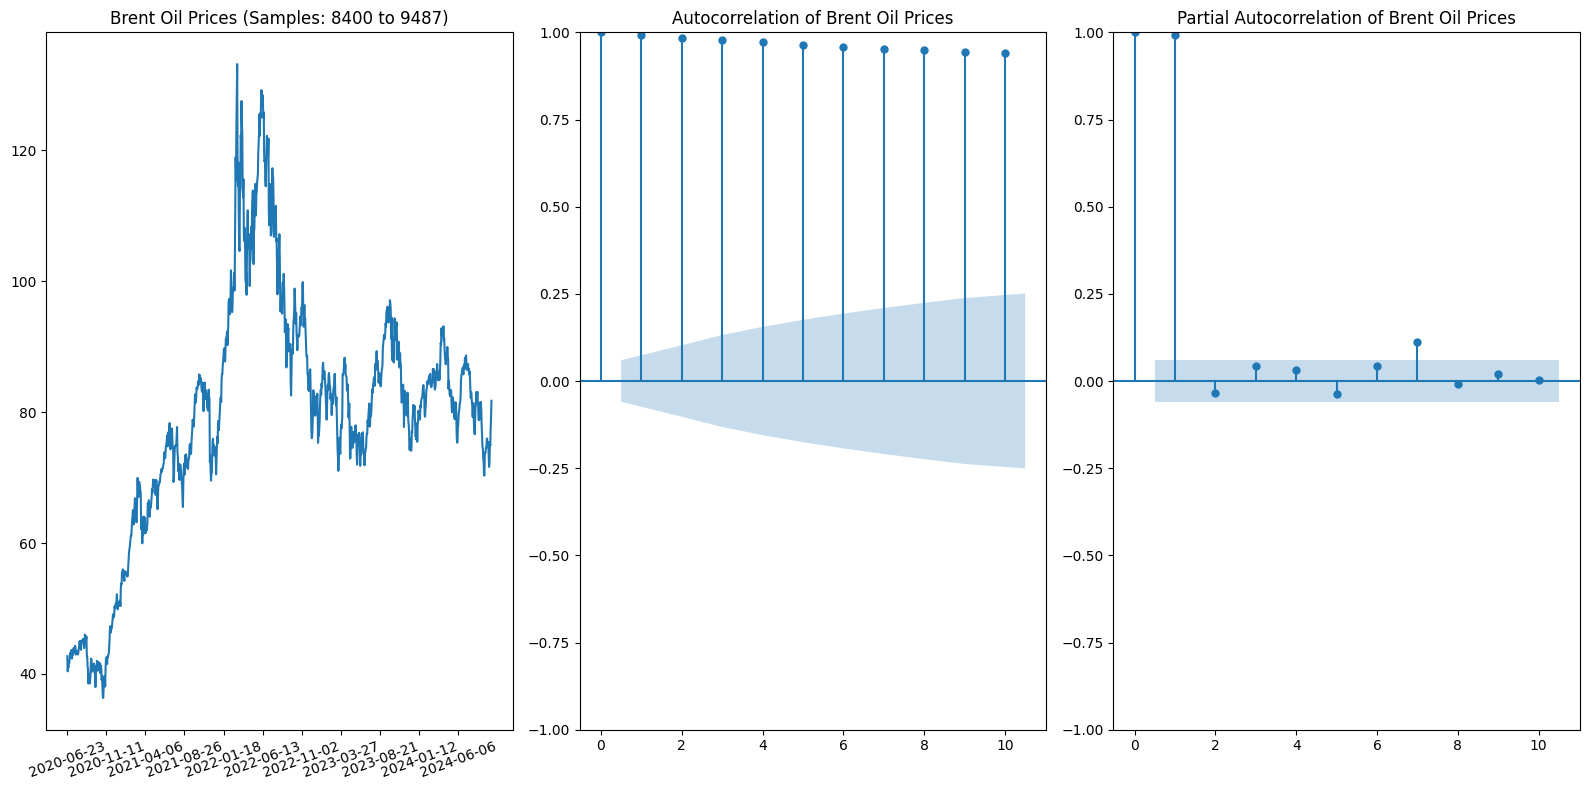

In [5]:
# Plot data from sample 500 to 1500 (size 1000)
plot_subset(df, start_index=500, subset_size=1000)

# Plot data from sample 2000 to 2500 (size 500)
plot_subset(df, start_index=2000, subset_size=600)

# Plot data from sample 8400 to the end
plot_subset(df, start_index=8400)

# PART 2: Plot first differences of the series and AC& PAC

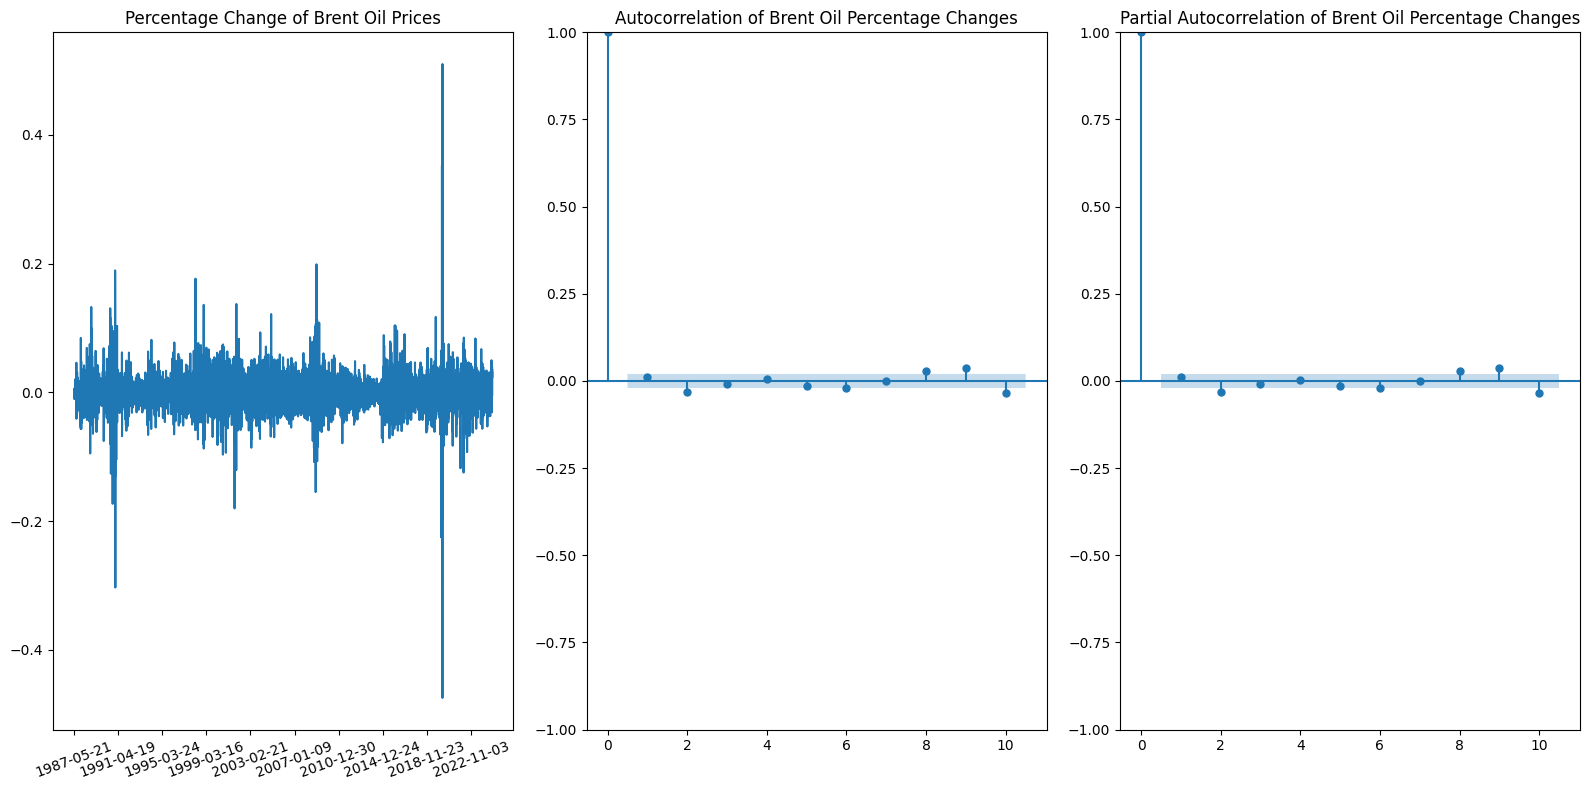

In [6]:
# Calculate percentage change if not done already
df['dy'] = df['y'].pct_change()

# Drop NaN values after calculating percentage change
df_dy = df.dropna(subset=['dy']).reset_index(drop=True)  # Reset index after dropping NaNs

# Plots
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

# Plot the percentage change (dy)
n_tick = 1000  # Set tick frequency
axs[0].plot(df_dy['dy'])

# Set x-ticks and x-tick labels
xticks = np.arange(0, len(df_dy['dy']), n_tick)  # Display every n-th tick
axs[0].set_xticks(xticks)

# Ensure that the number of labels matches the number of ticks
xtick_labels = df_dy['date'].iloc[xticks].astype(str)  # Extract corresponding date labels
axs[0].set_xticklabels(xtick_labels, rotation=20)

# Set title for the first plot
axs[0].set_title('Percentage Change of Brent Oil Prices')

# Plot the autocorrelation function (ACF) for percentage changes
sm.graphics.tsa.plot_acf(df_dy['dy'], lags=10, ax=axs[1])
axs[1].set_title('Autocorrelation of Brent Oil Percentage Changes')

# Plot the partial autocorrelation function (PACF) for percentage changes
sm.graphics.tsa.plot_pacf(df_dy['dy'], lags=10, ax=axs[2])
axs[2].set_title('Partial Autocorrelation of Brent Oil Percentage Changes')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the plots
plt.show()

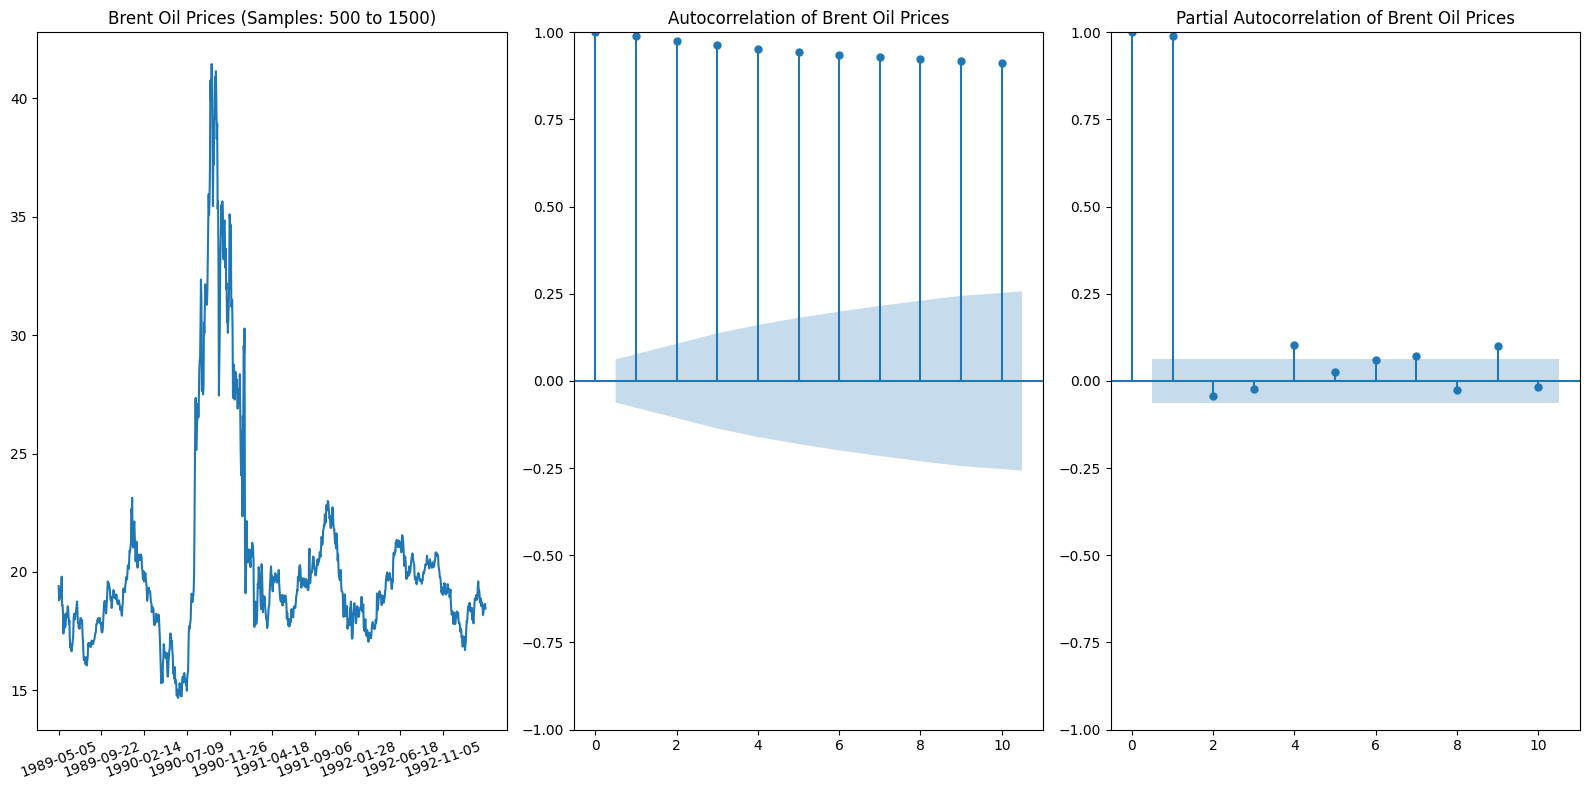

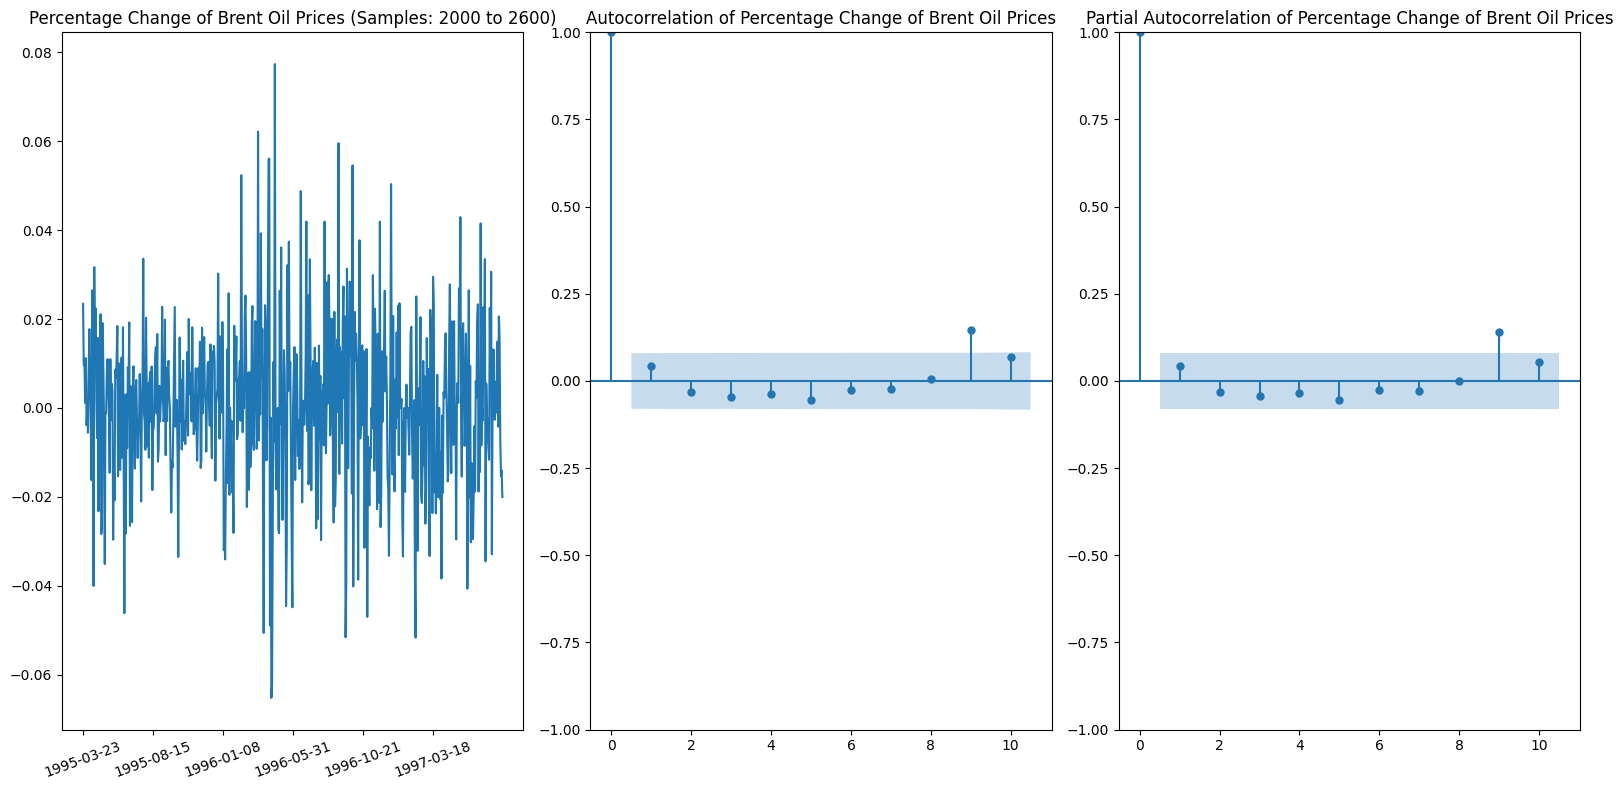

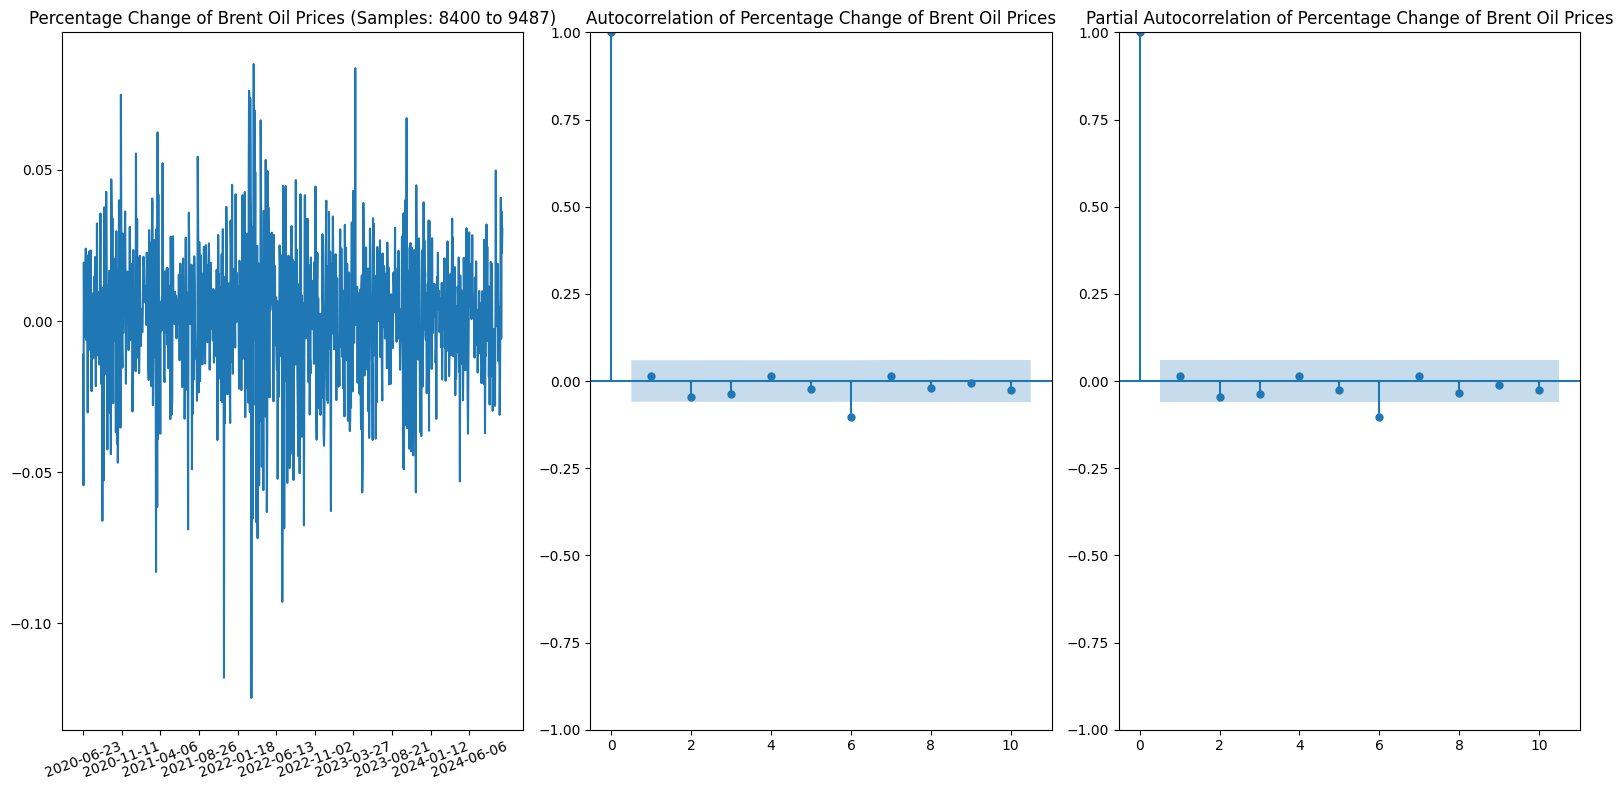

In [7]:
# Plot data from sample 500 to 1500 (size 1000) for Brent Oil Prices ('y')
plot_subset(df, start_index=500, subset_size=1000, column='y')

# Plot data from sample 2000 to 2500 (size 500) for Percentage Changes ('dy')
plot_subset(df, start_index=2000, subset_size=600, column='dy')

# Plot data from sample 8000 to the end for Percentage Changes ('dy')
plot_subset(df, start_index=8400, column='dy')